### Import Libaries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

### Download S&P 500 Data

In [15]:
start_date = pd.to_datetime(datetime.now()) - timedelta(days=365*20)
end_date = pd.to_datetime(datetime.now())

df = yf.download('^GSPC', start=start_date, end=end_date).stack()


[*********************100%***********************]  1 of 1 completed


In [16]:
df.head()

,Price,Close,High,Low,Open,Volume
Date,Ticker,,,,,
2005-01-04,^GSPC,1188.050049,1205.839966,1185.390015,1202.079956,1721000000
2005-01-05,^GSPC,1183.739990,1192.729980,1183.719971,1188.050049,1738900000
2005-01-06,^GSPC,1187.890015,1191.630005,1183.270020,1183.739990,1569100000
2005-01-07,^GSPC,1186.189941,1192.199951,1182.160034,1187.890015,1477900000
2005-01-10,^GSPC,1190.250000,1194.780029,1184.800049,1186.189941,1490400000


In [17]:
df.isnull().sum()

Price
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [18]:
df.columns = [col[0] for col in df.columns]

In [19]:
df.head()

,,C,H,L,O,V
Date,Ticker,,,,,
2005-01-04,^GSPC,1188.050049,1205.839966,1185.390015,1202.079956,1721000000
2005-01-05,^GSPC,1183.739990,1192.729980,1183.719971,1188.050049,1738900000
2005-01-06,^GSPC,1187.890015,1191.630005,1183.270020,1183.739990,1569100000
2005-01-07,^GSPC,1186.189941,1192.199951,1182.160034,1187.890015,1477900000
2005-01-10,^GSPC,1190.250000,1194.780029,1184.800049,1186.189941,1490400000


In [20]:
df.columns

Index(['C', 'H', 'L', 'O', 'V'], dtype='object')

In [21]:
df.head()

,,C,H,L,O,V
Date,Ticker,,,,,
2005-01-04,^GSPC,1188.050049,1205.839966,1185.390015,1202.079956,1721000000
2005-01-05,^GSPC,1183.739990,1192.729980,1183.719971,1188.050049,1738900000
2005-01-06,^GSPC,1187.890015,1191.630005,1183.270020,1183.739990,1569100000
2005-01-07,^GSPC,1186.189941,1192.199951,1182.160034,1187.890015,1477900000
2005-01-10,^GSPC,1190.250000,1194.780029,1184.800049,1186.189941,1490400000


In [22]:
df = df.droplevel('Ticker')

In [23]:
df.head()

,C,H,L,O,V
Date,,,,,
2005-01-04,1188.050049,1205.839966,1185.390015,1202.079956,1721000000
2005-01-05,1183.739990,1192.729980,1183.719971,1188.050049,1738900000
2005-01-06,1187.890015,1191.630005,1183.270020,1183.739990,1569100000
2005-01-07,1186.189941,1192.199951,1182.160034,1187.890015,1477900000
2005-01-10,1190.250000,1194.780029,1184.800049,1186.189941,1490400000


In [24]:
df.columns

Index(['C', 'H', 'L', 'O', 'V'], dtype='object')

In [25]:
df.columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

ValueError: Length mismatch: Expected axis has 5 elements, new values have 6 elements

In [14]:
df.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2005-01-04,1188.050049,1188.050049,1205.839966,1185.390015,1202.079956,1721000000
2005-01-05,1183.739990,1183.739990,1192.729980,1183.719971,1188.050049,1738900000
2005-01-06,1187.890015,1187.890015,1191.630005,1183.270020,1183.739990,1569100000
2005-01-07,1186.189941,1186.189941,1192.199951,1182.160034,1187.890015,1477900000
2005-01-10,1190.250000,1190.250000,1194.780029,1184.800049,1186.189941,1490400000


### Add Technical Indicator

$$
RSI = 100 - \frac{100}{1 + RS}
$$

$$
RS = \frac{\text{Average Gain}}{\text{Average Loss}}
$$

In [15]:
close_diff = df['Close'].diff()
gain = close_diff.where(close_diff>0, 0)
loss = -close_diff.where(close_diff<0,0)

avg_gain = gain.rolling(window=10).mean()
avg_loss = loss.rolling(window=10).mean()

RS = avg_gain/avg_loss

df['RSI'] = 100-(100/1+RS)

$$
Garman-Klass Volatility = \frac{(ln(High)-ln(low))^2}{2} - (2(ln(2)-1)(ln(Adj Close)-ln(Open))^2
$$

In [16]:
df['garman_klass_vol'] = (np.log(df['High'])-np.log(df['Low']))**2/2-(2*np.log(2)-1)*(np.log(df['Adj Close'])-np.log(df['Open']))**2

In [17]:
df.head()

,Adj Close,Close,High,Low,Open,Volume,RSI,garman_klass_vol
Date,,,,,,,,
2005-01-04,1188.050049,1188.050049,1205.839966,1185.390015,1202.079956,1721000000,NaN,0.000093
2005-01-05,1183.739990,1183.739990,1192.729980,1183.719971,1188.050049,1738900000,NaN,0.000024
2005-01-06,1187.890015,1187.890015,1191.630005,1183.270020,1183.739990,1569100000,NaN,0.000020
2005-01-07,1186.189941,1186.189941,1192.199951,1182.160034,1187.890015,1477900000,NaN,0.000035
2005-01-10,1190.250000,1190.250000,1194.780029,1184.800049,1186.189941,1490400000,NaN,0.000031


##### ATR

In [18]:
high_low = df['High'] - df['Low']
high_close = (df['High']-df['Close'].shift()).abs()
low_close = (df['Low']-df['Close'].shift()).abs()

true_range = pd.concat([high_low, high_close, low_close], axis=1)
df['ATR'] = true_range.max(axis=1).rolling(window=10).mean()

##### Bollinger Bands

In [19]:
df['SMA20'] = df['Close'].rolling(window=20).mean()
df['std_dev'] = df['Close'].rolling(window=20).std()

df['BBU'] = df['SMA20'] + (2*df['std_dev'])
df['BBL'] = df['SMA20'] - (2*df['std_dev'])

##### MACD

In [20]:
df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()

df['MACD'] = df['EMA12'] - df['EMA26']
df['MACD_signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

### Visualization

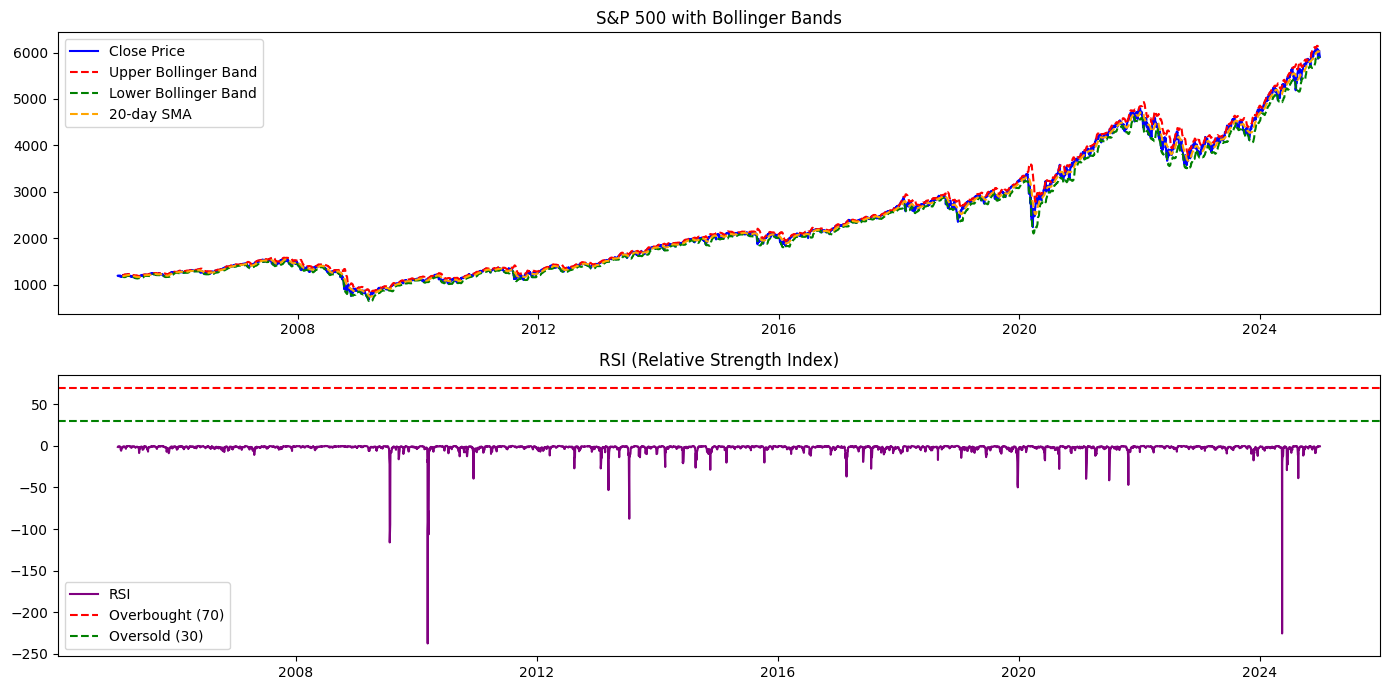

In [21]:
plt.figure(figsize=(14, 7))

#  Bollinger Bands
plt.subplot(2, 1, 1)
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['BBU'], label='Upper Bollinger Band', color='red', linestyle='--')
plt.plot(df['BBL'], label='Lower Bollinger Band', color='green', linestyle='--')
plt.plot(df['SMA20'], label='20-day SMA', color='orange', linestyle='--')
plt.title('S&P 500 with Bollinger Bands')
plt.legend()

# RSI
plt.subplot(2, 1, 2)
plt.plot(df['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('RSI (Relative Strength Index)')
plt.legend()

plt.tight_layout()
plt.show()


### Machine Learning

In [22]:
df.head(50)

,Adj Close,Close,High,Low,Open,Volume,RSI,garman_klass_vol,ATR,SMA20,std_dev,BBU,BBL,EMA12,EMA26,MACD,MACD_signal
Date,,,,,,,,,,,,,,,,,
2005-01-04,1188.050049,1188.050049,1205.839966,1185.390015,1202.079956,1721000000,NaN,0.000093,NaN,NaN,NaN,NaN,NaN,1188.050049,1188.050049,0.000000,0.000000
2005-01-05,1183.739990,1183.739990,1192.729980,1183.719971,1188.050049,1738900000,NaN,0.000024,NaN,NaN,NaN,NaN,NaN,1187.386963,1187.730785,-0.343822,-0.068764
2005-01-06,1187.890015,1187.890015,1191.630005,1183.270020,1183.739990,1569100000,NaN,0.000020,NaN,NaN,NaN,NaN,NaN,1187.464355,1187.742580,-0.278225,-0.110656
2005-01-07,1186.189941,1186.189941,1192.199951,1182.160034,1187.890015,1477900000,NaN,0.000035,NaN,NaN,NaN,NaN,NaN,1187.268292,1187.627570,-0.359278,-0.160381
2005-01-10,1190.250000,1190.250000,1194.780029,1184.800049,1186.189941,1490400000,NaN,0.000031,NaN,NaN,NaN,NaN,NaN,1187.727016,1187.821824,-0.094808,-0.147266
2005-01-11,1182.989990,1182.989990,1190.250000,1180.430054,1190.250000,1488800000,NaN,0.000020,NaN,NaN,NaN,NaN,NaN,1186.998243,1187.463910,-0.465667,-0.210946
2005-01-12,1187.699951,1187.699951,1187.920044,1175.640015,1182.989990,1562100000,NaN,0.000048,NaN,NaN,NaN,NaN,NaN,1187.106198,1187.481395,-0.375197,-0.243796
2005-01-13,1177.449951,1177.449951,1187.699951,1175.810059,1187.699951,1510300000,NaN,0.000022,NaN,NaN,NaN,NaN,NaN,1185.620622,1186.738325,-1.117703,-0.418578
2005-01-14,1184.520020,1184.520020,1185.209961,1177.449951,1177.449951,1335400000,NaN,0.000008,NaN,NaN,NaN,NaN,NaN,1185.451298,1186.574006,-1.122708,-0.559404


In [23]:
df.dropna(inplace=True)

In [24]:
df.head()

,Adj Close,Close,High,Low,Open,Volume,RSI,garman_klass_vol,ATR,SMA20,std_dev,BBU,BBL,EMA12,EMA26,MACD,MACD_signal
Date,,,,,,,,,,,,,,,,,
2005-02-01,1189.410034,1189.410034,1190.390015,1180.949951,1181.270020,1681980000,-0.814513,0.000013,9.864990,1180.774500,8.707701,1198.189901,1163.359098,1178.718374,1181.080639,-2.362265,-3.113224
2005-02-02,1193.189941,1193.189941,1195.250000,1188.920044,1189.410034,1561740000,-1.355626,0.000010,9.340991,1181.031494,9.004518,1199.040531,1163.022457,1180.944769,1181.977625,-1.032856,-2.697150
2005-02-03,1189.890015,1189.890015,1193.189941,1185.640015,1193.189941,1554460000,-1.797794,0.000017,8.974988,1181.338995,9.204667,1199.748329,1162.929661,1182.320961,1182.563728,-0.242767,-2.206274
2005-02-04,1203.030029,1203.030029,1203.469971,1189.670044,1189.890015,1648160000,-4.313863,0.000020,9.191980,1182.095996,10.326043,1202.748082,1161.443910,1185.506971,1184.079750,1.427221,-1.479575
2005-02-07,1201.719971,1201.719971,1204.150024,1199.270020,1203.030029,1347270000,-5.867914,0.000008,8.751978,1182.872498,11.197267,1205.267032,1160.477964,1188.001279,1185.386433,2.614846,-0.660691


In [25]:
df['Target'] = df['Close'].shift(-1)
df.dropna(inplace=True)
X = df[['RSI', 'garman_klass_vol', 'ATR', 'SMA20', 'std_dev', 'BBU', 'BBL', 'EMA12', 'EMA26', 'MACD', 'MACD_signal']]
y = df['Target']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [28]:
lr_model = LinearRegression()
rl_model = RandomForestRegressor(n_estimators=100, random_state = 2025)

In [29]:
lr_model.fit(X_train, y_train)
rl_model.fit(X_train, y_train)

RandomForestRegressor(random_state=2025)

In [30]:
lr_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
print(f"Linear Regression: {lr_mse}")

rl_pred = rl_model.predict(X_test)
rl_mse = mean_squared_error(y_test, rl_pred)
print(f"Random Forest Regressor: {rl_mse}")

Linear Regression: 1049.6858433960851
Random Forest Regressor: 1130.0922348705565


In [31]:
lr_pred

array([3358.88671051, 1998.25123998, 4698.08627507, ..., 1195.23854856,
       4471.38271459, 1343.40540313])

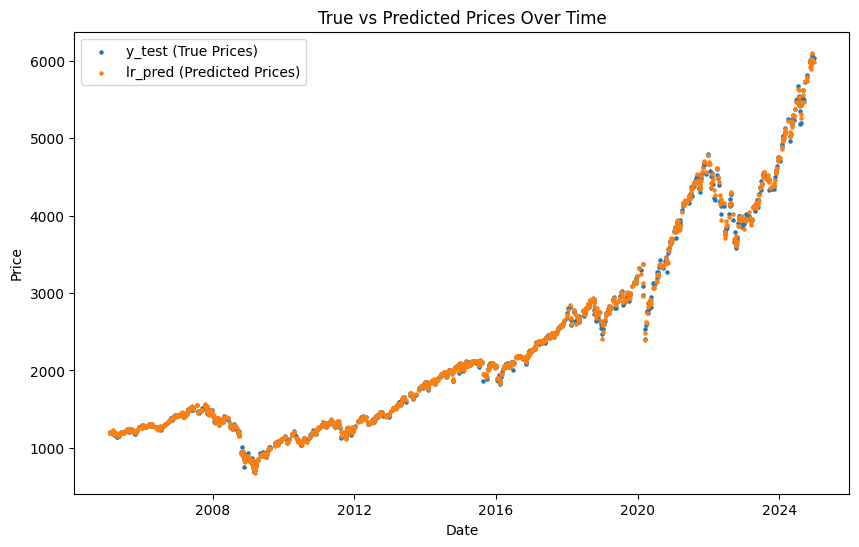

In [32]:
# Convert y_test to DataFrame
y_test_df = pd.DataFrame(list(y_test.items()), columns=["Date", "y_test"])

# Add predictions from lr_pred to the DataFrame
y_test_df["lr_pred"] = lr_pred

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_df["Date"], y_test_df["y_test"], s=5, label="y_test (True Prices)")
plt.scatter(y_test_df["Date"], y_test_df["lr_pred"], s=5, label="lr_pred (Predicted Prices)")

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("True vs Predicted Prices Over Time")
plt.legend()


# Display the plot
plt.show()

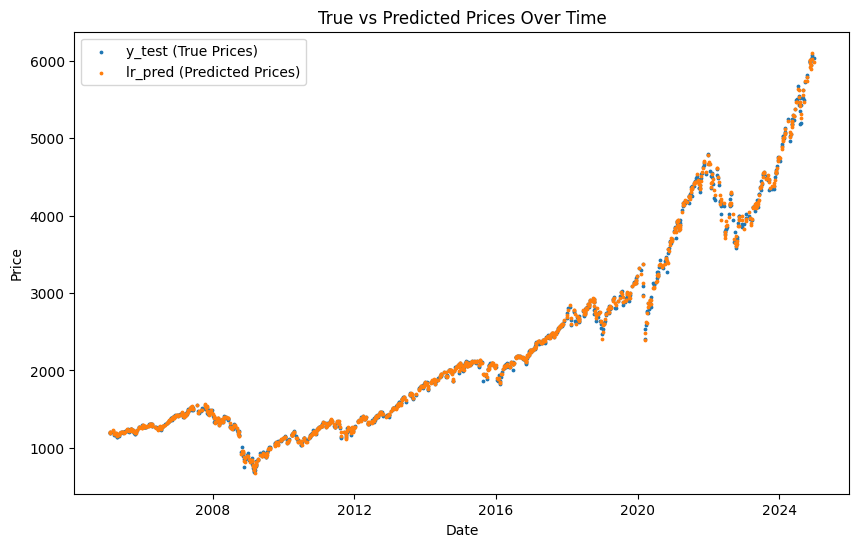

In [ ]:
# Convert y_test to DataFrame
y_test_df = pd.DataFrame(list(y_test.items()), columns=["Date", "y_test"])

# Add predictions from lr_pred to the DataFrame
y_test_df["lr_pred"] = lr_pred

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_df["Date"], y_test_df["y_test"], s=3, label="y_test (True Prices)")
plt.scatter(y_test_df["Date"], y_test_df["lr_pred"], s=3, label="lr_pred (Predicted Prices)")

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("True vs Predicted Prices Over Time")
plt.legend()

# Display the plot
plt.show()